# Lab4
> 0856029 Yu Shao, Liu 劉昱劭

## Introduction
In this lab, we implement a seq2seq encoder-decoder network with recurrent
units for English spelling correction. 
We use LSTM to build Encode and Decoder.

## BPTT
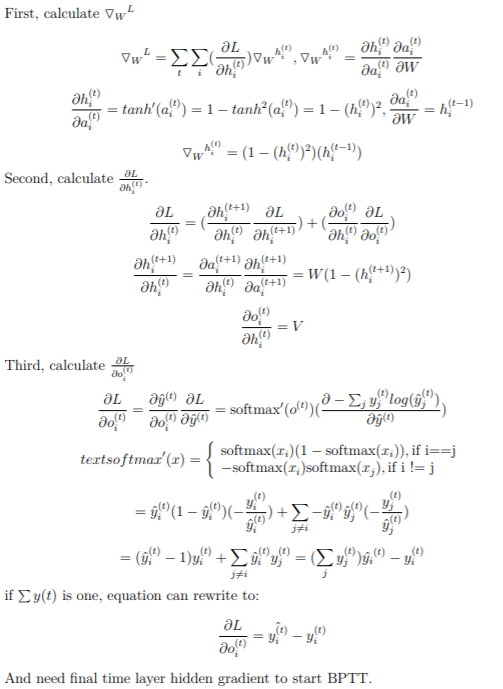


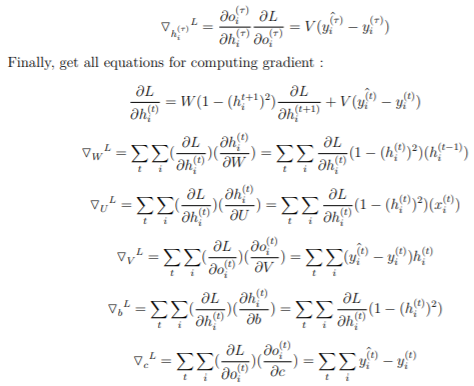

## Explanation 
### Encoder

In [3]:
from __future__ import unicode_literals, print_function, division
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.LSTM(hidden_size, hidden_size)

    def forward(self, input, hidden_state, cell_state):
        embedded = self.embedding(input).view(1, 1, -1)  # view(1,1,-1) due to input of rnn must be (seq_len,batch,vec_dim)
        output,(hidden_state,cell_state) = self.rnn(embedded, (hidden_state,cell_state) )
        return output,hidden_state,cell_state

    def init_h0(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)
    def init_c0(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)


### Decoder

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.LSTM(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, input_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden_state, cell_state):
        output = self.embedding(input).view(1, 1, -1)
        output = F.relu(output)
        output, (hidden_state,cell_state) = self.rnn(output, (hidden_state,cell_state) )
        output = self.softmax(self.out(output[0]))
        return output,hidden_state,cell_state

    def init_h0(self):
        """
        :return: (num_layers * num_directions, batch, hidden_size)
        """
        return torch.zeros(1, 1, self.hidden_size, device=device)
    def init_c0(self):
        """
        :return: (num_layers * num_directions, batch, hidden_size)
        """
        return torch.zeros(1, 1, self.hidden_size, device=device)


## Evaluation using BLEU-4
* load testing data
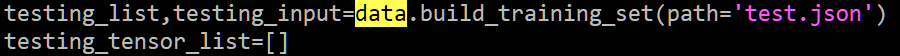

* testing
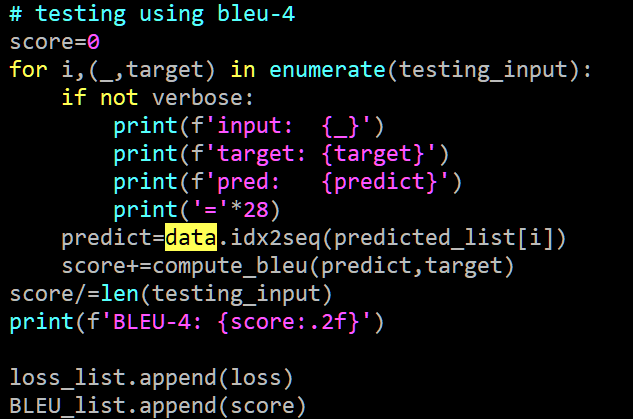

## Results & Discussion

### output sample
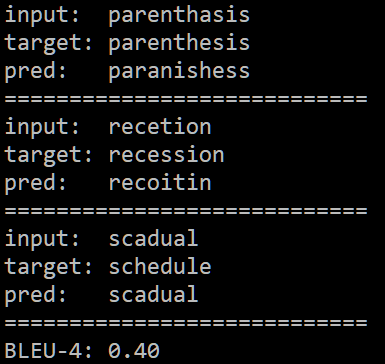

## Try 256 hidden units
We could see that large teacher forcing ratio might improve BLEU-4 score faster a little bit.

* teacher_forcing ratio = 1 
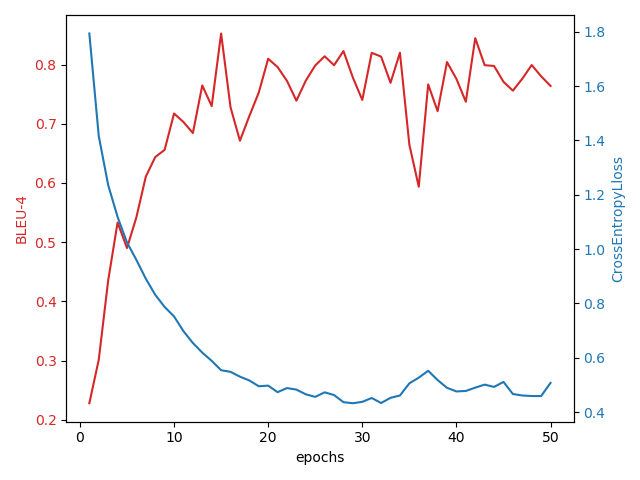

* teacher_forcing ratio = 0.5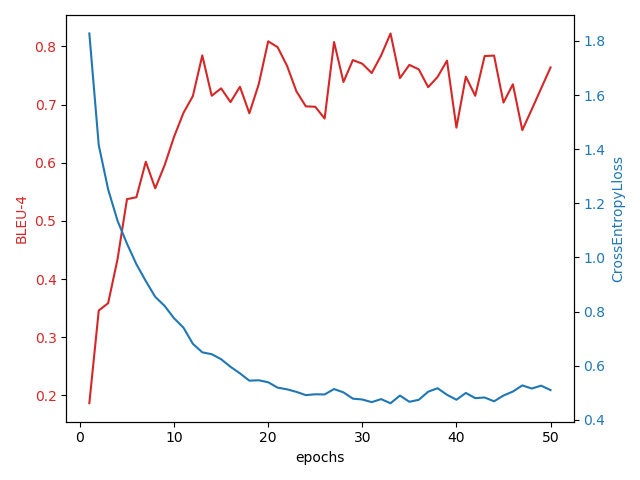

* teacher_forcing ratio = 0
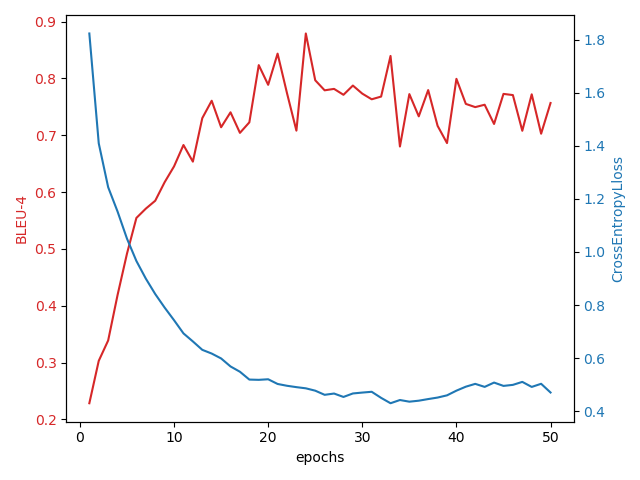

## Try 512 hidden units

We could see using 512 hidden units could achieve higher BLEU-4 score (about 0.95) and learning curve is much more smooth

* teacher_forcing ratio = 1 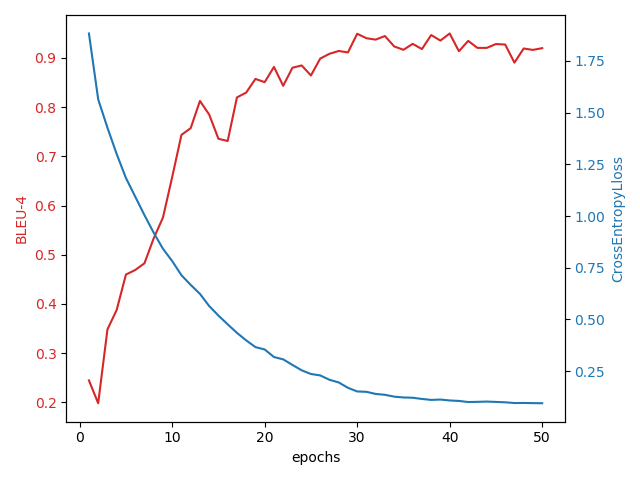

* teacher_forcing ratio = 0.5

* teacher_forcing ratio = 0

## other discussion
* This lab is less computational intensive, due to batch_size=1 (I didn't set larger batch_size)


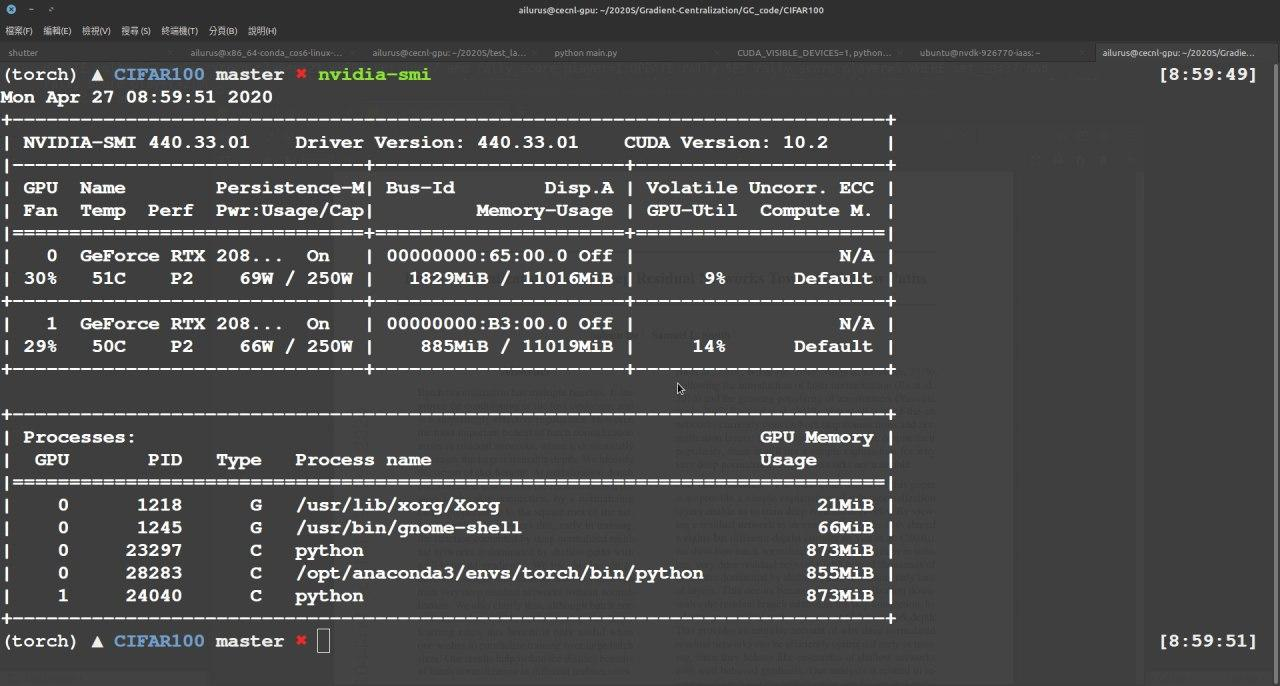

* Hence, I could train many models with different teacher_forcing ratio at the same time 
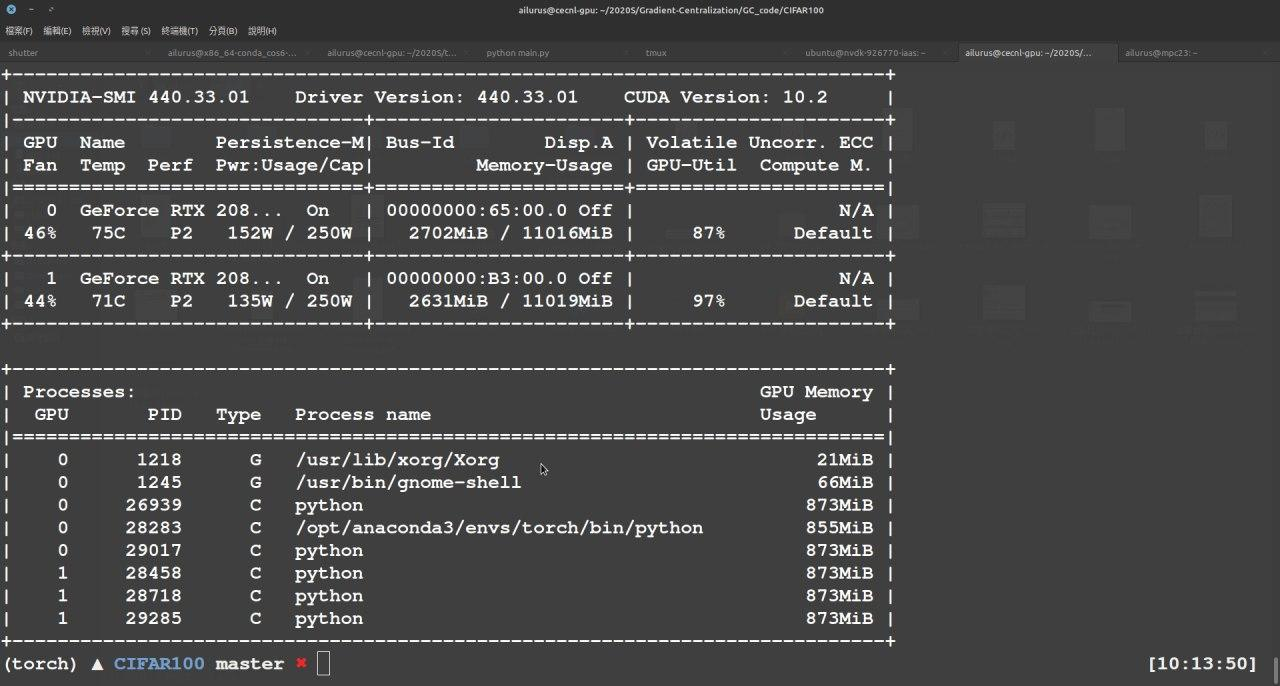